# Modelos de clasificación (XGBoost, Logistic Regression, Random Forest)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler

## Conjunto de entrenamiento (70%) y prueba (30%)

In [4]:
#Text-Original
ruta_1 = r'C:\Users\Yara\Documents\Servicio Social\Autextification-2024\Entrenar modelo\train_S1.csv'
ruta_2 = r'C:\Users\Yara\Documents\Servicio Social\Autextification-2024\Entrenar modelo\test_S1.csv'
train_data = pd.read_csv(ruta_1)
test_data = pd.read_csv(ruta_2)

In [5]:
train_data.head()

,id,text,label
0,15442,Es un tribunal de suprema instanza que forma p...,generated
1,26409,Aixó de tindrer la platgeta tant prou era un p...,human
2,12777,Doug mcadam es un científico estadista estadou...,generated
3,41050,"Traídas de francia, tan estrafalarias que una ...",generated
4,91814,A saída trives – baiona será ás 8 30h da mañá ...,generated


In [6]:
test_data.head()

,id,text,label
0,63467,"El president de la generalitat, carles puigdem...",generated
1,51831,El peso del remordimiento caía sobre mis hombr...,generated
2,100408,Another magnificent chapter from @nbchannibal ...,human
3,123641,"R hoarsely, ""don""t be frightened. father""s tum...",human
4,74823,"Temp: 18,6°c, viento: 32,4km/h s, hum: 49%, se...",human


In [7]:
#Métricas calculadas
ruta_1 = r'C:\Users\Yara\Documents\Servicio Social\Autextification-2024\Entrenar modelo\Añadir metricas\Stylometry\train_add_sty.csv'
ruta_2 = r'C:\Users\Yara\Documents\Servicio Social\Autextification-2024\Entrenar modelo\Añadir metricas\Stylometry\test_add_sty.csv'
train_graph = pd.read_csv(ruta_1)
test_graph = pd.read_csv(ruta_2)

In [8]:
#Normalización
columns = ['degree', 'neighbor_degree', 'number_strong_comp', 'entropy_centr', 'entropy_clos','nodes','edges',
          'node_connectivity', 'self_loop', 'girth','LexicalDiversity','MeanWordLen','MeanSentenceLen',
           'StdevSentenceLen','MeanParagraphLen','DocumentLen','Commas','Semicolons','Quotes','Exclamations',
           'Colons','Dashes','Mdashes']
scaler = MinMaxScaler()
train_graph[columns] = scaler.fit_transform(train_graph[columns])
test_graph[columns] = scaler.fit_transform(test_graph[columns])

In [9]:
train_graph['label'] = np.where(train_graph['label']=='generated',1,0)

test_graph['label'] = np.where(test_graph['label']=='generated',1,0)

y_train_data=train_graph['label']

y_test_data=test_graph['label']

In [10]:
not_column = ['label']
columns = [col for col in train_graph.columns if col not in not_column]
X_train_graph = train_graph[columns]
X_test_graph = test_graph[columns]

In [11]:
X_train_graph.head()

,id,clustering,global_efficiency,closeness,degree,degree_centrality,betweenness,neighbor_degree,assortativity,transitivity,...,StdevSentenceLen,MeanParagraphLen,DocumentLen,Commas,Semicolons,Quotes,Exclamations,Colons,Dashes,Mdashes
0,15442,0.391811,0.475953,0.345198,0.579439,0.077519,0.015013,0.233960,-0.178036,0.174899,...,0.053599,0.298292,0.289281,0.152331,0.0,0.0,0.004537,0.000000,0.0,0.007216
1,26409,0.348889,0.615238,0.254044,0.231776,0.371429,0.043956,0.022905,-0.073394,0.500000,...,0.000000,0.003942,0.007714,0.133867,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,12777,0.339836,0.459357,0.314912,0.572407,0.097087,0.020272,0.135549,-0.027979,0.223178,...,0.051304,0.216820,0.223508,0.070633,0.0,0.0,0.000000,0.010183,0.0,0.000000
3,41050,0.335001,0.513095,0.331500,0.478555,0.156494,0.033880,0.097769,-0.029979,0.258320,...,0.032423,0.102497,0.093179,0.125500,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,91814,0.297962,0.495914,0.297067,0.366773,0.153562,0.054610,0.060577,-0.114930,0.318352,...,0.008753,0.057819,0.045676,0.034621,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [12]:
X_test_graph.head()

,id,clustering,global_efficiency,closeness,degree,degree_centrality,betweenness,neighbor_degree,assortativity,transitivity,...,StdevSentenceLen,MeanParagraphLen,DocumentLen,Commas,Semicolons,Quotes,Exclamations,Colons,Dashes,Mdashes
0,63467,0.352597,0.476843,0.353801,0.625664,0.069291,0.012751,0.312792,-0.172325,0.159559,...,0.022367,0.308627,0.351020,0.220000,0.0,0.0,0.0,0.009845,0.0,0.0
1,51831,0.355193,0.467223,0.358083,0.664703,0.062255,0.010668,0.346218,-0.155238,0.156692,...,0.026502,0.368165,0.391362,0.125349,0.0,0.0,0.0,0.000000,0.0,0.0
2,100408,0.339784,0.624728,0.317055,0.303167,0.352941,0.062296,0.055794,-0.113348,0.459016,...,0.011287,0.008505,0.016882,0.123200,0.0,0.0,0.0,0.000000,0.0,0.0
3,123641,0.314504,0.555026,0.327793,0.383170,0.201587,0.050747,0.093700,-0.133673,0.300000,...,0.013397,0.032807,0.032449,0.062857,0.0,0.0,0.0,0.000000,0.0,0.0
4,74823,0.528872,0.650000,0.440961,0.404223,0.366667,0.039348,0.128483,-0.341489,0.283981,...,0.000000,0.007290,0.016444,0.570370,0.0,0.0,0.0,0.561529,0.0,0.0


## Modelo XGBoost

In [14]:
modelo_XGB = XGBClassifier(n_estimators=100, random_state=0) #Modelo XGBoost
modelo_XGB.fit(X_train_graph, y_train_data)
predictions = modelo_XGB.predict(X_test_graph)
score = f1_score(y_test_data,predictions, average='macro')

print(f'Score final del test: {score:.3f}') #Calificación
print(f'Accuracy del test: {accuracy_score(y_test_data, predictions):.3f}') #Exactitud

Score final del test: 0.638
Accuracy del test: 0.643


### Matriz de confusión (XGB)

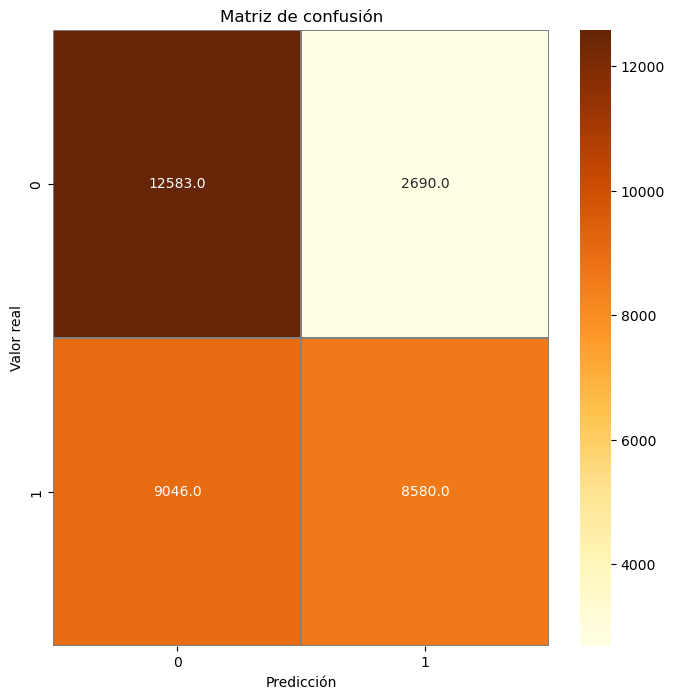

In [16]:
y_pred = modelo_XGB.predict(X_test_graph)

confusion_mtx = confusion_matrix(y_test_data, y_pred)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="YlOrBr",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

#0: human
#1: generated

## Modelo Logistic Regression

In [18]:
#Métricas-ablación (sólo eliminamos la columna assortativity)

X_train_graph_1 = X_train_graph.drop('assortativity', axis=1)
X_test_graph_1 = X_test_graph.drop('assortativity', axis=1)

In [19]:
X_train_graph_1.head()

,id,clustering,global_efficiency,closeness,degree,degree_centrality,betweenness,neighbor_degree,transitivity,number_strong_comp,...,StdevSentenceLen,MeanParagraphLen,DocumentLen,Commas,Semicolons,Quotes,Exclamations,Colons,Dashes,Mdashes
0,15442,0.391811,0.475953,0.345198,0.579439,0.077519,0.015013,0.233960,0.174899,0.014085,...,0.053599,0.298292,0.289281,0.152331,0.0,0.0,0.004537,0.000000,0.0,0.007216
1,26409,0.348889,0.615238,0.254044,0.231776,0.371429,0.043956,0.022905,0.500000,0.197183,...,0.000000,0.003942,0.007714,0.133867,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,12777,0.339836,0.459357,0.314912,0.572407,0.097087,0.020272,0.135549,0.223178,0.056338,...,0.051304,0.216820,0.223508,0.070633,0.0,0.0,0.000000,0.010183,0.0,0.000000
3,41050,0.335001,0.513095,0.331500,0.478555,0.156494,0.033880,0.097769,0.258320,0.042254,...,0.032423,0.102497,0.093179,0.125500,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,91814,0.297962,0.495914,0.297067,0.366773,0.153562,0.054610,0.060577,0.318352,0.000000,...,0.008753,0.057819,0.045676,0.034621,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [20]:
modelo_LR = LogisticRegression(random_state=0, max_iter=3000) #Modelo LR
modelo_LR.fit(X_train_graph_1, y_train_data)
predictions = modelo_LR.predict(X_test_graph_1)
score = f1_score(y_test_data,predictions, average='macro')

print(f'Score final del test: {score:.3f}') #Calificación
print(f'Accuracy del test: {accuracy_score(y_test_data, predictions):.3f}') #Exactitud

Score final del test: 0.712
Accuracy del test: 0.715


### Matriz de confusión (LR)

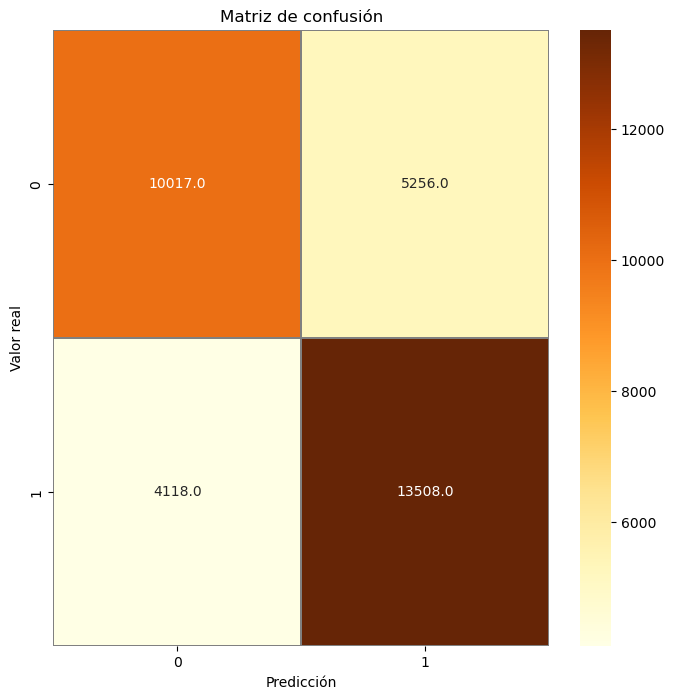

In [22]:
y_pred = modelo_LR.predict(X_test_graph_1)

confusion_mtx = confusion_matrix(y_test_data, y_pred)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="YlOrBr",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

#0: human
#1: generated

## Modelo Random Forest

In [24]:
modelo_RF = RandomForestClassifier(n_estimators=100, random_state=0) #Modelo RF
modelo_RF.fit(X_train_graph_1, y_train_data)
predictions = modelo_RF.predict(X_test_graph_1)
score = f1_score(y_test_data,predictions, average='macro')

print(f'Score final del test: {score:.3f}') #Calificación
print(f'Accuracy del test: {accuracy_score(y_test_data, predictions):.3f}') #Exactitud

Score final del test: 0.719
Accuracy del test: 0.719


### Matriz de confusión (RF)

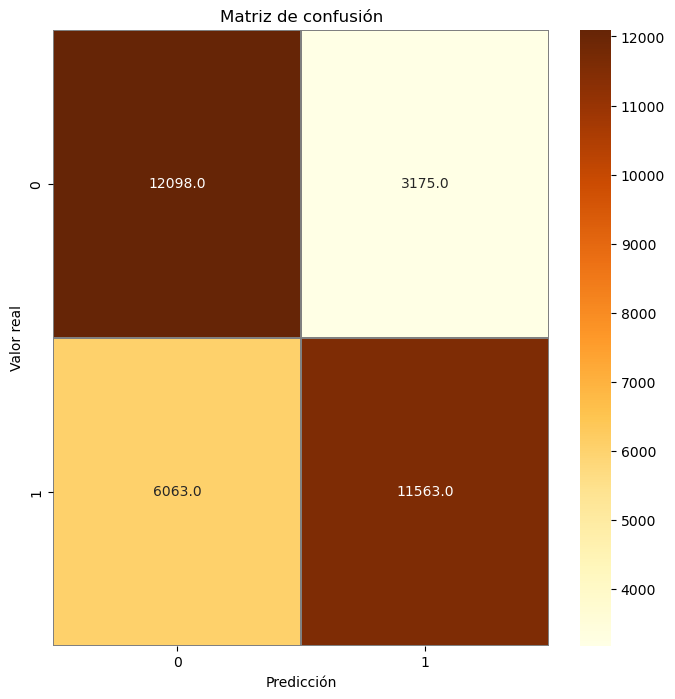

In [26]:
y_pred = modelo_RF.predict(X_test_graph_1)

confusion_mtx = confusion_matrix(y_test_data, y_pred)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="YlOrBr",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

#0: human
#1: generated